## Evelyn Komalasari Hartono // 0706022310001

### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
data = pd.read_csv(url)
data.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [3]:
# describe data
data.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


It seems like every attribute is safe to use. Neither of them also had a null value. Mostly consists of int or float, indicating that they're already in number value. Only education needs to be encoded (since the data type showed it as object, and also we could see the word on word value from df.info()). 

In [5]:
# show unique values from dataset
unique_values = {col: data[col].unique() for col in data.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

In [6]:
# duplicate data
df = data.copy()

from sklearn.preprocessing import OrdinalEncoder

education_mapping = {'High School': 0, 'Bachelor': 1, 'PhD': 2, 'Master': 3}
df['Education'] = data['Education'].map(education_mapping)

df.sample(n = 5)

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
126,26439.48987,48,1,493,12,91,4990.052428,6909.424075,3789.586179,0.717488,1,0.433555
315,43402.54074,36,2,642,8,11,9884.063416,41490.263410,19443.509670,0.788246,3,0.289322
354,65213.31210,60,2,328,19,47,4428.642948,36828.093740,7410.943961,0.310212,3,0.643521
491,69417.28141,34,3,420,14,1,5980.661024,42173.333200,2818.456745,0.819883,2,0.192384
46,40778.69208,26,3,413,19,56,1450.828941,6602.708900,17290.796460,0.741454,1,0.497724


### Explanatory Data Analysis

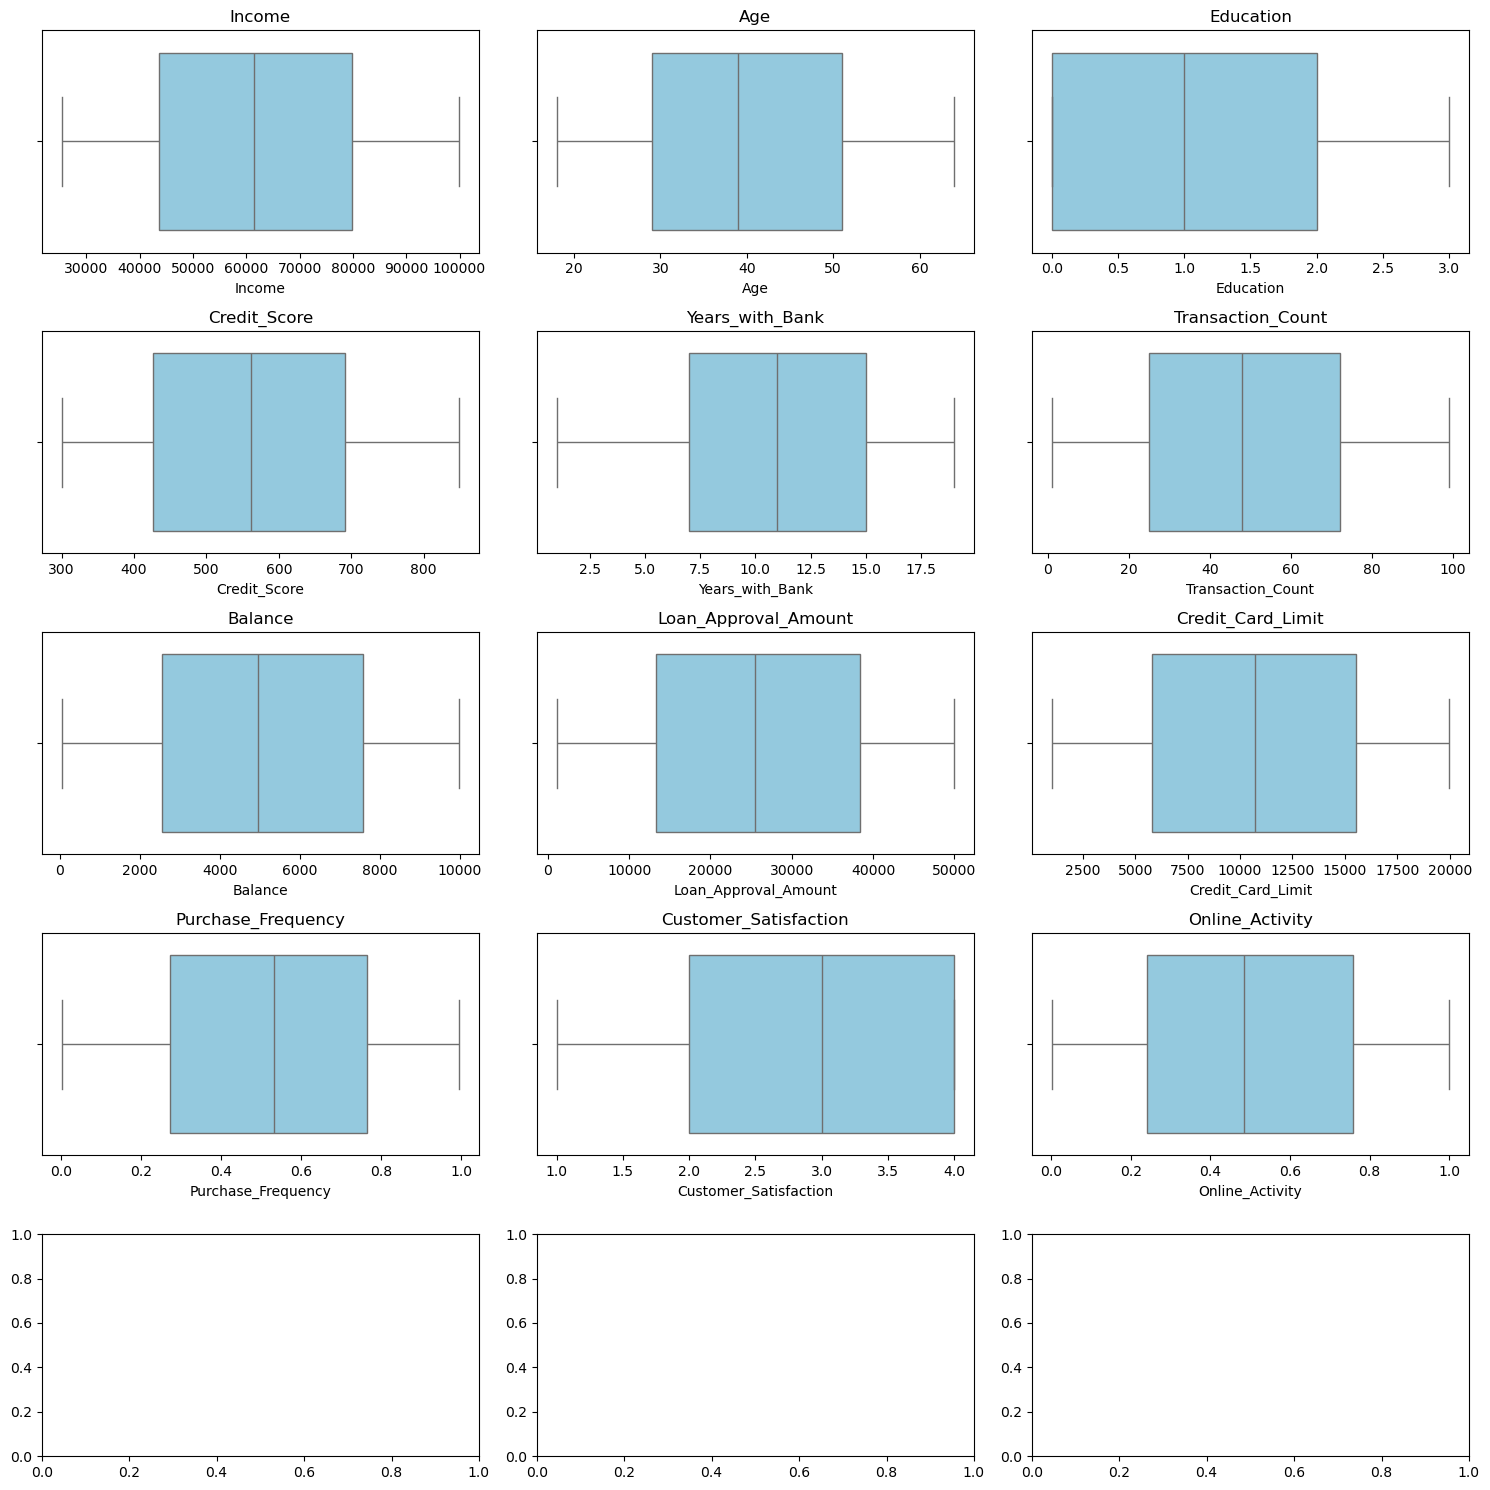

In [7]:
num_cols = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

There's no outlier visible on each of the attributes. Indicating that there won't be an extreme value that could tampered the data model later on.

C:\Users\lyn\AppData\Local\Temp\ipykernel_26364\3785631104.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer_Satisfaction', y='Transaction_Count', data=df, palette='viridis', ci=None)
C:\Users\lyn\AppData\Local\Temp\ipykernel_26364\3785631104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Satisfaction', y='Transaction_Count', data=df, palette='viridis', ci=None)


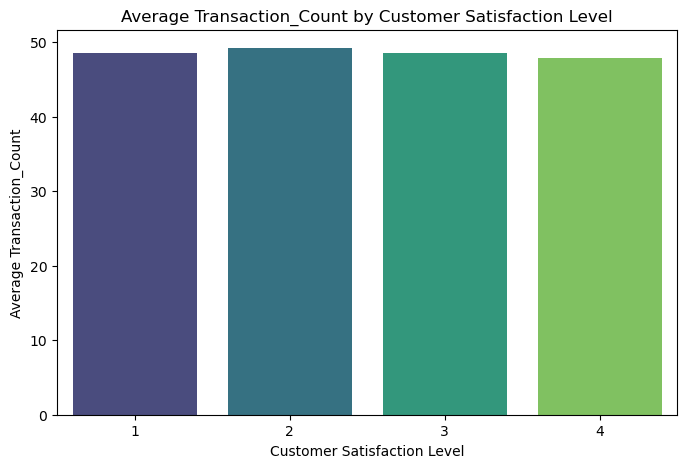

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Satisfaction', y='Transaction_Count', data=df, palette='viridis', ci=None)
plt.title('Average Transaction_Count by Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Average Transaction_Count')
plt.show()

The transaction count for each customer satisfaction doesn't really matter. Since the average transaction count almost gives the same value regardless their satisfactiory. Maybe the transaction count is little less on the 4th satisfaction rate. 

C:\Users\lyn\AppData\Local\Temp\ipykernel_26364\2201194479.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer_Satisfaction', y='Credit_Score', data=df, palette='viridis', ci=None)
C:\Users\lyn\AppData\Local\Temp\ipykernel_26364\2201194479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Satisfaction', y='Credit_Score', data=df, palette='viridis', ci=None)


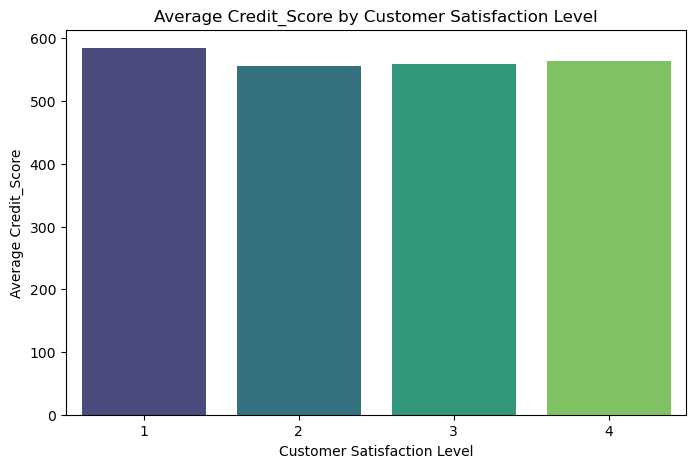

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Satisfaction', y='Credit_Score', data=df, palette='viridis', ci=None)
plt.title('Average Credit_Score by Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Average Credit_Score')
plt.show()

Infact this goes the same as the credit score. There's no significant different in between the ratings. But the credit score is increased on the 1st customer satisfaction level.

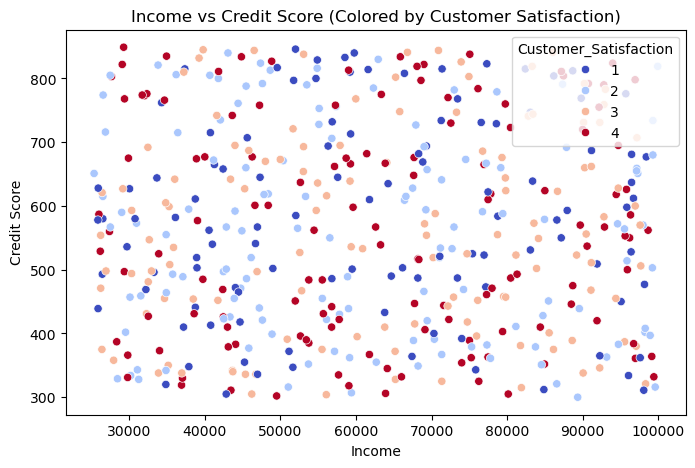

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Income', y='Credit_Score', hue='Customer_Satisfaction', data=df, palette='coolwarm')
plt.title('Income vs Credit Score (Colored by Customer Satisfaction)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()

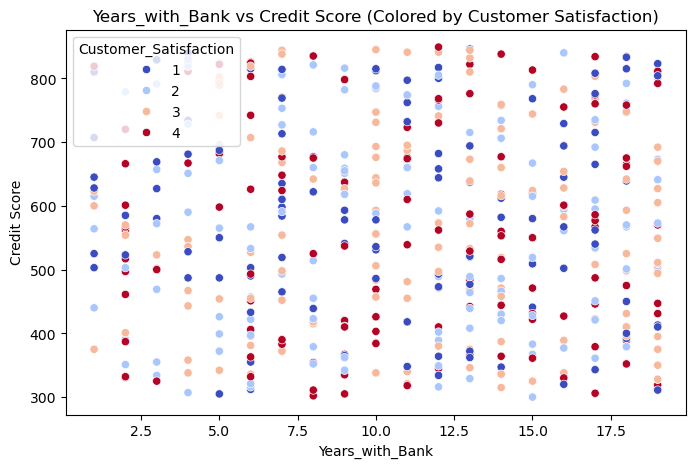

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Years_with_Bank', y='Credit_Score', hue='Customer_Satisfaction', data=df, palette='coolwarm')
plt.title('Years_with_Bank vs Credit Score (Colored by Customer Satisfaction)')
plt.xlabel('Years_with_Bank')
plt.ylabel('Credit Score')
plt.show()

From the two scatter plot (as well as other visualization). We could see that all of the entries are distributed evenly in every aspect. We couldn't really see any skewed regarding a certain pattern. Hence this means that the data is pretty much randomly distributed. 

### Clustering Modeling

Using Hierarchical Clustering

In [12]:
num_cols = df.select_dtypes(include=['number']).columns
X = df[num_cols]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=num_cols)
df_scaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,1.303097,-0.350009,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013
1,0.749977,1.533191,-1.242889,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427
2,0.364249,0.459420,-1.242889,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595
3,0.165665,0.152629,-1.242889,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907
4,-0.250263,-0.307558,-0.350009,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898


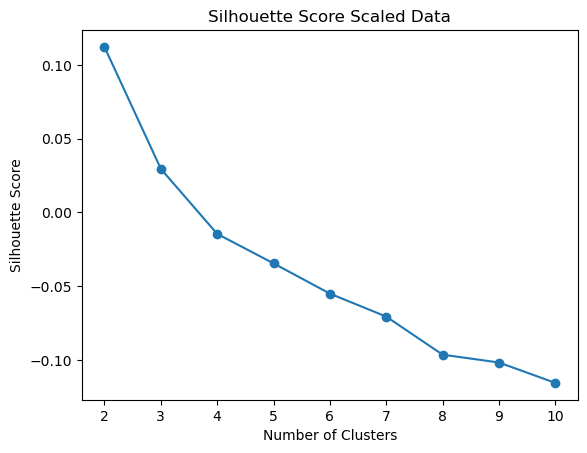

In [13]:
# SCALED ver.
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Scaled Data")
plt.show()

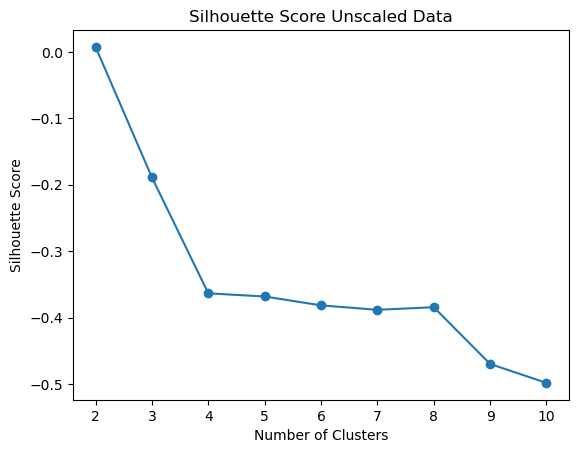

In [14]:
# UNSCALED ver.
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Unscaled Data")
plt.show()

In the scaled data, the silhouette scores are decreases gradually, while in the unscaled data, some point of the score drops significantly, although it's later dropping gradually.

Skipping Ward linkage with Manhattan metric (not supported).


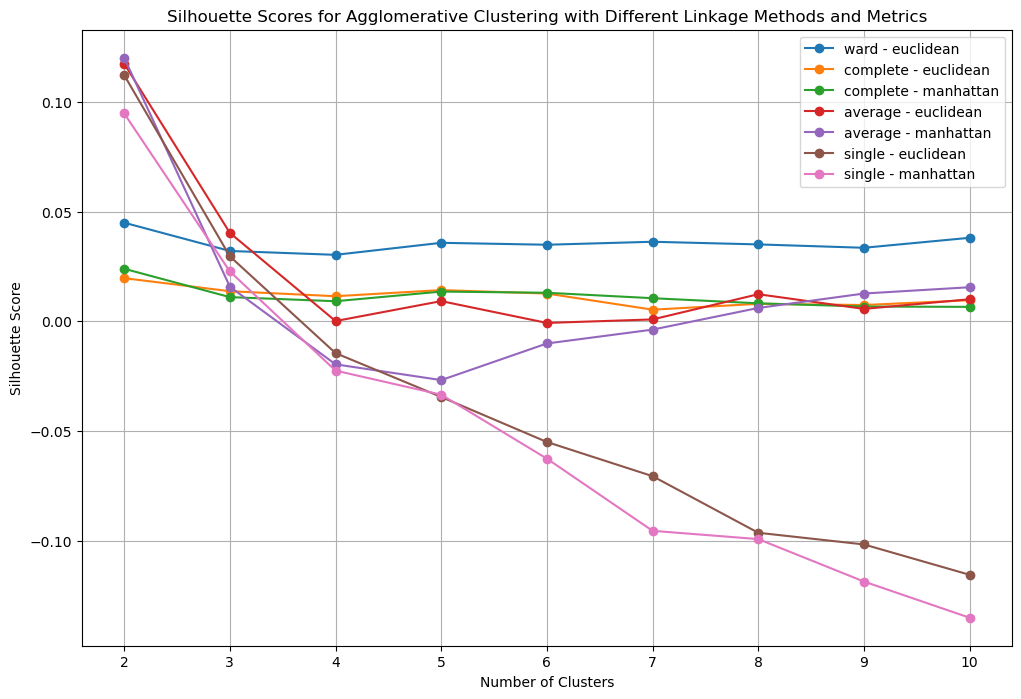

Best Silhouette Score: 0.120108893472827
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [15]:
# Define the range of clusters to test and linkage methods (SCALED)
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Skipping Ward linkage with Manhattan metric (not supported).


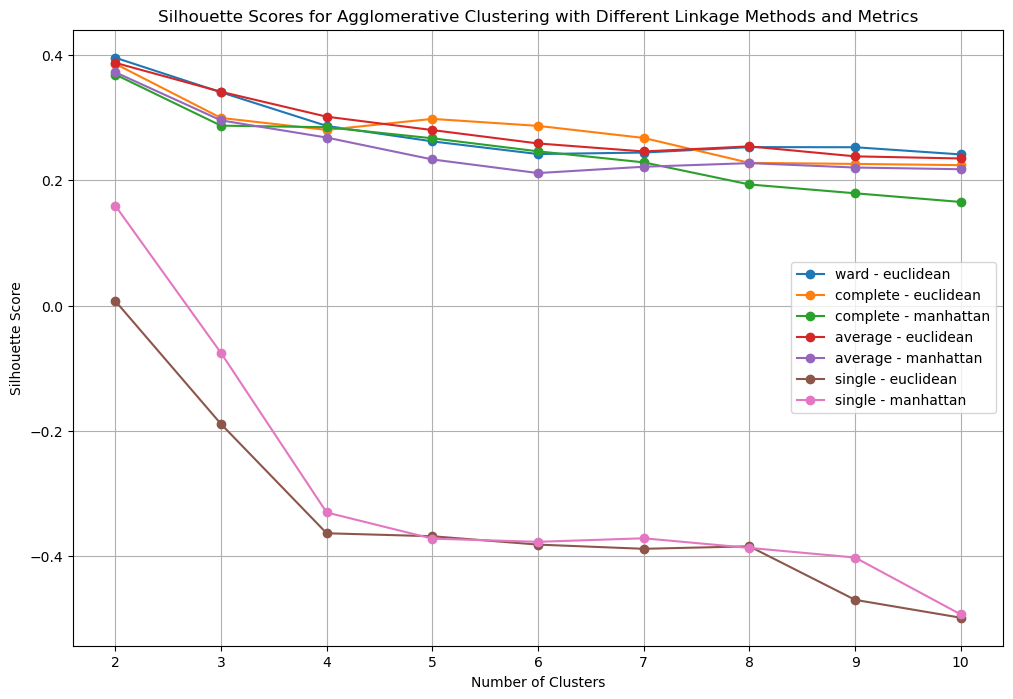

Best Silhouette Score: 0.3957270694733502
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [16]:
# Define the range of clusters to test and linkage methods (UNSCALED)
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df)
            silhouette_avg = silhouette_score(df, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

The two of them gaves different suggestion regarding the methods. So we'll try both of them on each models. 

In [17]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage="ward", metric="euclidean")
y_hc = agglo.fit_predict(df)

agglo = AgglomerativeClustering(n_clusters=2, linkage="average", metric="manhattan")
y_hc_scaled = agglo.fit_predict(df_scaled)

In [18]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc
df_scaled['Agglo'] = y_hc_scaled

# Analyze the clusters with the original values
df_scaled.head()   

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
0,0.179150,1.303097,-0.350009,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013,0
1,0.749977,1.533191,-1.242889,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427,0
2,0.364249,0.459420,-1.242889,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595,0
3,0.165665,0.152629,-1.242889,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907,0
4,-0.250263,-0.307558,-0.350009,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898,0


In [19]:
df.head()   

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


In [20]:
score_unscaled = silhouette_score(df, y_hc)
score_scaled = silhouette_score(df_scaled, y_hc_scaled)

print(f"Silhouette Score (Unscaled): {score_unscaled:.4f}")
print(f"Silhouette Score (Scaled): {score_scaled:.4f}")


Silhouette Score (Unscaled): 0.3957
Silhouette Score (Scaled): 0.1346


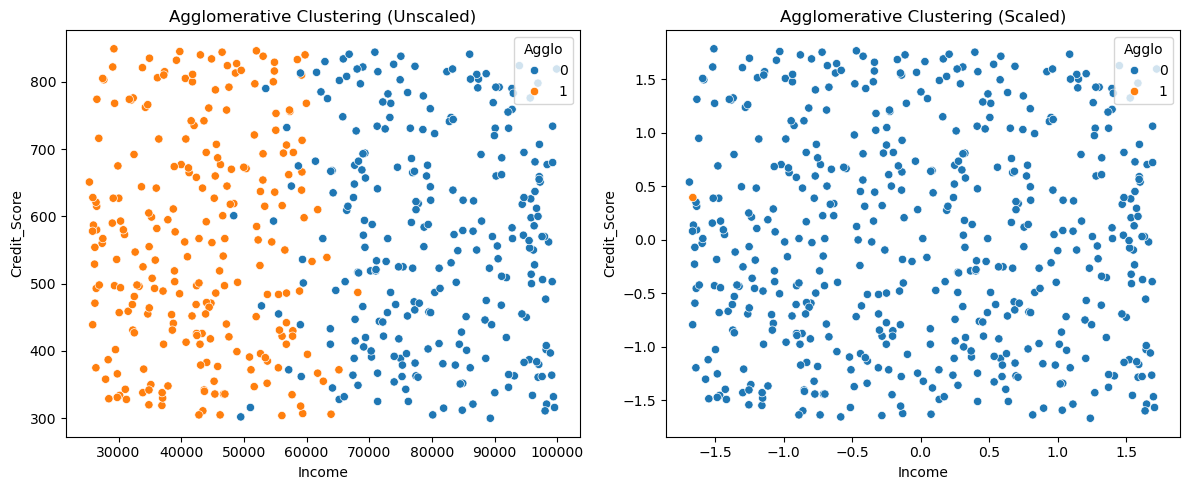

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x='Income', y='Credit_Score', hue='Agglo', data=df, palette='tab10', ax=axes[0])
axes[0].set_title('Agglomerative Clustering (Unscaled)')

sns.scatterplot(x='Income', y='Credit_Score', hue='Agglo', data=df_scaled, palette='tab10', ax=axes[1])
axes[1].set_title('Agglomerative Clustering (Scaled)')

plt.tight_layout()
plt.show()


The results indicate that the Agglomerative Clustering model performs better on the unscaled data, as shown by a higher Silhouette Score (0.3957) compared to the scaled version (0.1346). The plot also demonstrates clearer separation between the two clusters, where the unscaled one shows a distinct seperation in between credit score and income. While the scaled version instead clustered most of them as one, leaving just one behind. 

### Segmentation & Managerial Implication

After applying clustering on both scaled and unscaled datasets. The unscaled version produced clearer and more interpretable clusters, as indicated by a higher silhouette score and more distinct group boundaries in the scatter plot.

Without scaling, financial variables such as income, credit score, and loan amount kept their natural influence, makes the algorithm to form groups that better reflect real-world financial differences. In contrast, scaling equalized all variables and reduced the interpretability of clusters. 

In [ ]:
cluster_profile_unscaled = df.groupby('Agglo').mean(numeric_only=True).round(2)
print(cluster_profile_unscaled)

         Income    Age  Education  Credit_Score  Years_with_Bank  \
Agglo                                                              
0      80056.38  40.01       1.37        566.54            10.58   
1      42948.96  40.01       1.41        563.32            11.05   

       Transaction_Count  Balance  Loan_Approval_Amount  Credit_Card_Limit  \
Agglo                                                                        
0                  45.57  5307.33              24079.85           10299.05   
1                  51.65  4797.95              26820.82           10946.80   

       Purchase_Frequency  Customer_Satisfaction  Online_Activity  
Agglo                                                              
0                    0.52                   2.60             0.47  
1                    0.51                   2.52             0.52  


Cluster 0: “Higher-income customers with strong financial capacity, moderate online activity, and slightly higher satisfaction levels. They maintain larger balances, higher credit limits, and loan approvals, indicating stable and loyal financial behavior.”

Cluster 1: “Lower-income customers who are slightly more digitally active but less financially stable. They show lower balances and satisfaction levels, representing a segment with potential for engagement growth through digital banking and financial support programs.”

Managerial Recommendation:

Cluster 0: 
1. Focus on retention through loyalty-based programs. 
2. Offer personalized financial products (investment plans, credit upgrades, exclusive benefits) to strengthen long-term relationships.

Cluster 1: 
1. Prioritize growth by increasing engagement (can by digital marketing campaigns, mobile app incentives, or financial education initiatives).
2. Promote accessible savings to build trust and gradually improve their financial stability.
